In [2]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
prices=df["price"]
areas=df["area"]

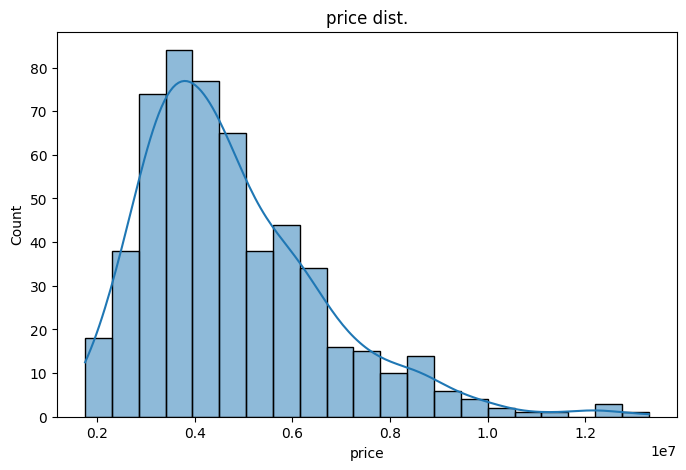

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(prices,kde=True)
plt.title("price dist.")
plt.xlabel("price")
plt.ylabel("Count")
plt.show()

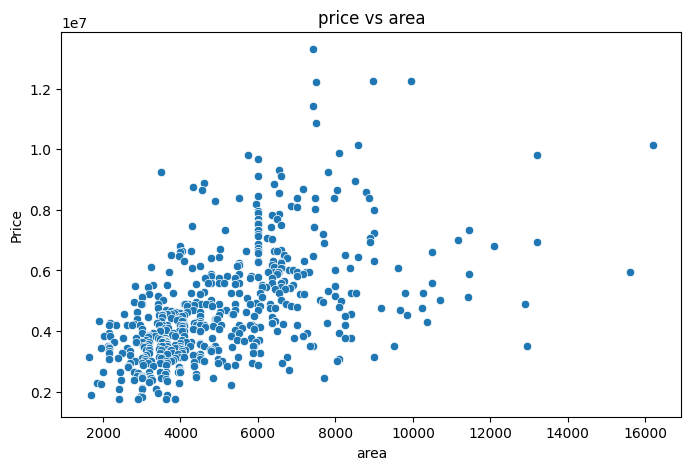

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="area",y="price",data=df)
plt.title("price vs area")
plt.xlabel("area")
plt.ylabel("Price")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder


le_mainroad=LabelEncoder()
le_guestroom=LabelEncoder()
le_basement=LabelEncoder()
le_hotwaterheating=LabelEncoder()
le_airconditioning=LabelEncoder()
le_prefarea=LabelEncoder()
le_furnishingstatus=LabelEncoder()

df["mainroad"]=le_mainroad.fit_transform(df["mainroad"])
df["guestroom"]=le_guestroom.fit_transform(df["guestroom"])
df["basement"]=le_basement.fit_transform(df["basement"])
df["hotwaterheating"]=le_hotwaterheating.fit_transform(df["hotwaterheating"])
df["airconditioning"]=le_airconditioning.fit_transform(df["airconditioning"])
df["prefarea"]=le_prefarea.fit_transform(df["prefarea"])
df["furnishingstatus"]=le_furnishingstatus.fit_transform(df["furnishingstatus"])


In [10]:
x=df.drop(["price"],axis=1)

y=df["price"]


In [11]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [12]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
y_pred= model.predict(x_test)

In [15]:
y_pred[0:10]

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ✅ RMSE is often used in regression
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
accuracy = r2 * 100
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 979679.6912959905
Mean Squared Error (MSE): 1771751116594.0344
Root Mean Squared Error (RMSE): 1331071.4167895103
R^2 Score: 0.6494754192267804
Accuracy: 64.95%


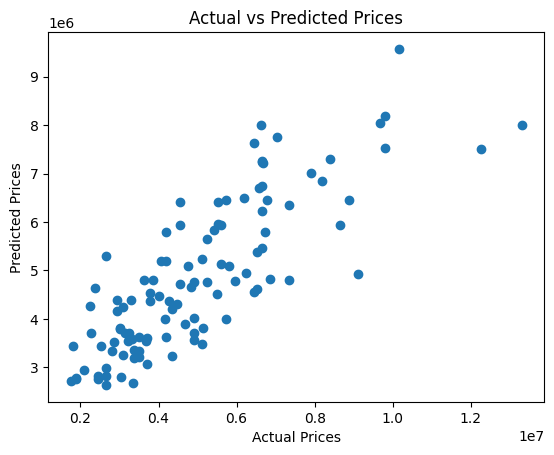

In [17]:
# Plot 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [27]:
# 1. Naya Sample Data (Wahi columns jo aapne training mein use kiye)
sample_data = {
    "area":2000,
    "bedrooms": 4,
    "bathrooms": 2,
    "stories": 2,
    "mainroad": 'yes',
    "guestroom": "no",
    "basement": "yes",
    "hotwaterheating": "no",
    "airconditioning": "yes",
    "parking": 2,
    "prefarea": "yes",
    "furnishingstatus": "furnished"
}

sample_df = pd.DataFrame([sample_data])

# 2. Aapke apne Label Encoders use karte huay Transform karein
sample_df["mainroad"] = le_mainroad.transform(sample_df["mainroad"])
sample_df["guestroom"] = le_guestroom.transform(sample_df["guestroom"])
sample_df["basement"] = le_basement.transform(sample_df["basement"])
sample_df["hotwaterheating"] = le_hotwaterheating.transform(sample_df["hotwaterheating"])
sample_df["airconditioning"] = le_airconditioning.transform(sample_df["airconditioning"])
sample_df["prefarea"] = le_prefarea.transform(sample_df["prefarea"])
sample_df["furnishingstatus"] = le_furnishingstatus.transform(sample_df["furnishingstatus"])


# 4. Final Prediction
prediction = model.predict(sample_df)

print(f"Ghar ki Predicted Price hai: {prediction[0]:,.2f}")

Ghar ki Predicted Price hai: 6,712,708.68


In [5]:
!pip install joblib

In [ ]:
import joblib

with open("AttributeError")